# Implementation of Ensemble Method

## Introduction

Ensemble methods are kinds of methods using multiple learning algorithms to obtain better predictive performance than could be obtained from any of the constituent learning algorithms alone.

## Dataset 

For our Ensemble Methods, we will be working with the "Boston Housing Dataset." This dataset contains valuable information about various aspects of houses.For the Boston Housing dataset, there are 13 features:

- **CRIM:** Per capita crime rate by town

- **ZN:** Proportion of residential land zoned for lots over 25,000 sq.ft.

- **INDUS:** Proportion of non-retail business acres per town

- **CHAS:** Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)

- **NOX:** Nitric oxides concentration (parts per 10 million)

- **RM:** Average number of rooms per dwelling

- **AGE:** Proportion of owner-occupied units built prior to 1940

- **DIS:** Weighted distances to five Boston employment centers

- **RAD:** Index of accessibility to radial highways

- **TAX:** Full-value property-tax rate per 10000 dollar

- **PTRATIO:** Pupil-teacher ratio by town

- **B:** 1000 * (Bk - 0.63) ** 2 where Bk is the proportion of Black people by town

- **LSTAT:** % lower status of the population



In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_openml
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Load the dataset
boston = fetch_openml(name='boston', version=1)

X = boston.data
y = boston.target

print(X.head())
print(y.head())




      CRIM    ZN  INDUS CHAS    NOX     RM   AGE     DIS RAD    TAX  PTRATIO  \
0  0.00632  18.0   2.31    0  0.538  6.575  65.2  4.0900   1  296.0     15.3   
1  0.02731   0.0   7.07    0  0.469  6.421  78.9  4.9671   2  242.0     17.8   
2  0.02729   0.0   7.07    0  0.469  7.185  61.1  4.9671   2  242.0     17.8   
3  0.03237   0.0   2.18    0  0.458  6.998  45.8  6.0622   3  222.0     18.7   
4  0.06905   0.0   2.18    0  0.458  7.147  54.2  6.0622   3  222.0     18.7   

        B  LSTAT  
0  396.90   4.98  
1  396.90   9.14  
2  392.83   4.03  
3  394.63   2.94  
4  396.90   5.33  
0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: MEDV, dtype: float64


C:\Users\zircon\anaconda3\Lib\site-packages\sklearn\datasets\_openml.py:1002: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [11]:
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize Bagging Regressor with DecisionTreeRegressor as base estimator
bagging_reg = BaggingRegressor(DecisionTreeRegressor(random_state=42),
                               n_estimators=100,
                               random_state=42)
bagging_reg.fit(X_train, y_train)

# Random Forest
random_forest_reg = RandomForestRegressor(n_estimators=100, random_state=42)
random_forest_reg.fit(X_train, y_train)

# Making predictions with the Bagging Regressor
y_pred_bagging = Bagging_reg.predict(X_test)

# Evaluating the Bagging Regressor
mse_bagging = mean_squared_error(y_test, y_pred_bagging)
r2_bagging = r2_score(y_test, y_pred_bagging)
print(f"Bagging Regressor MSE: {mse_bagging}")
print(f"Bagging Regressor R2 Score: {r2_bagging}")

# Making predictions with the Random Forest Regressor
y_pred_rf = random_forest_reg.predict(X_test)

# Evaluating the Random Forest Regressor
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
print(f"Random Forest Regressor MSE: {mse_rf}")
print(f"Random Forest Regressor R2 Score: {r2_rf}")

Bagging Regressor MSE: 8.09091723529412
Bagging Regressor R2 Score: 0.8896699871925919
Random Forest Regressor MSE: 7.901513892156864
Random Forest Regressor R2 Score: 0.8922527442109116


## Interpretation of Results

We have evaluated the performance of two regression models, the Bagging Regressor and the Random Forest Regressor, on our dataset. Here are the results:

### Bagging Regressor

- **MSE (Mean Squared Error)**: The Bagging Regressor achieved an MSE of approximately 8.0909. This metric quantifies the average squared difference between predicted and actual values, and a lower MSE indicates better model accuracy.

- **R2 Score (Coefficient of Determination)**: The R2 Score for the Bagging Regressor is approximately 0.8896. This score represents the proportion of the variance in the target variable that is explained by the model. An R2 score closer to 1 indicates a better fit to the data, so the Bagging Regressor's performance suggests a moderate level of predictive accuracy.

### Random Forest Regressor

- **MSE (Mean Squared Error)**: The Random Forest Regressor yielded an MSE of approximately 7.9015. This metric evaluates the model's prediction accuracy, with a lower MSE indicating better performance.

- **R2 Score (Coefficient of Determination)**: The R2 Score for the Random Forest Regressor is approximately 0.8922. This score reflects how well the model explains the variance in the target variable. The Random Forest Regressor's R2 score suggests a similar level of predictive accuracy to the Bagging Regressor.

In summary, both the Bagging Regressor and the Random Forest Regressor have demonstrated moderate predictive performance. While the MSE values indicate that there is room for improvement in reducing prediction errors, the R2 scores suggest that the models explain a reasonable portion of the variance in the target variable. Further tuning and feature engineering may enhance the models' predictive capabilities.

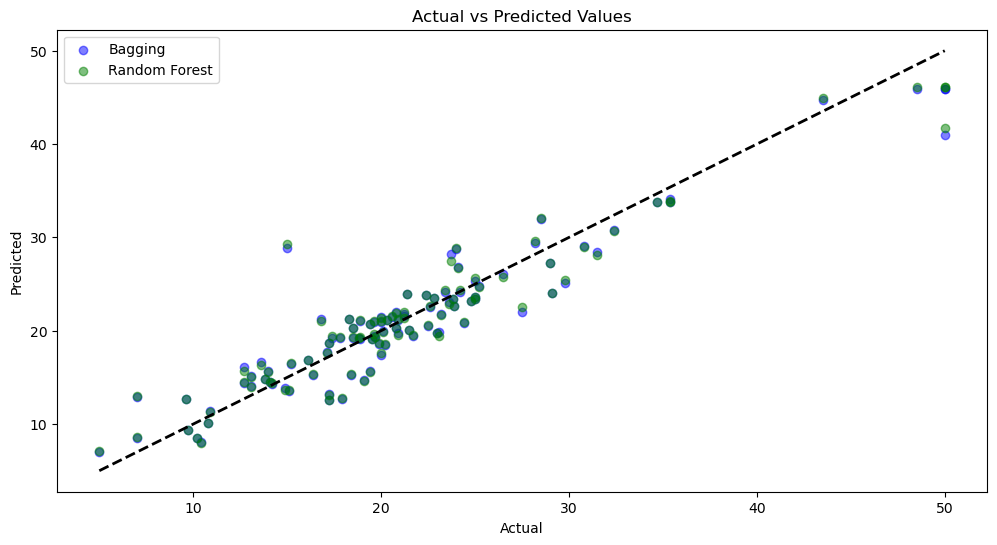

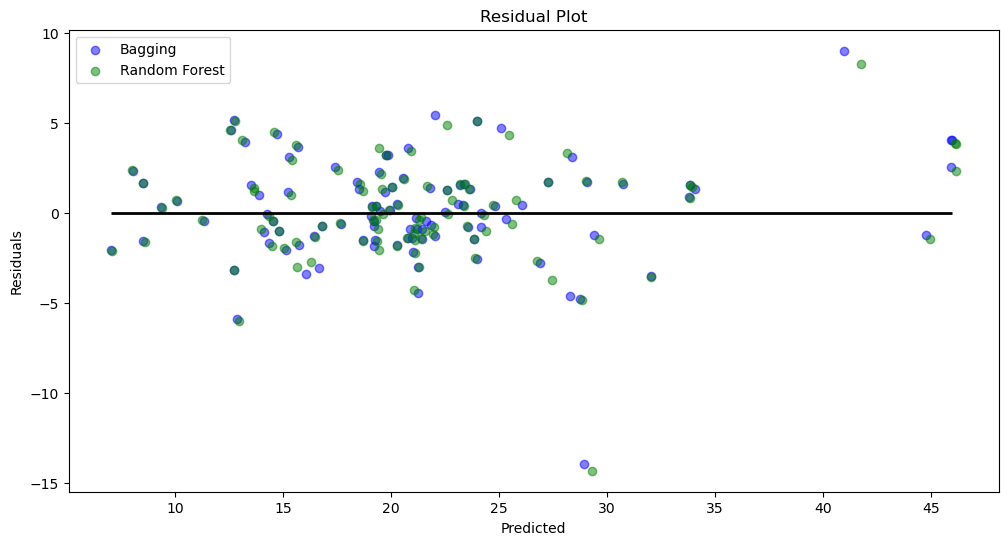

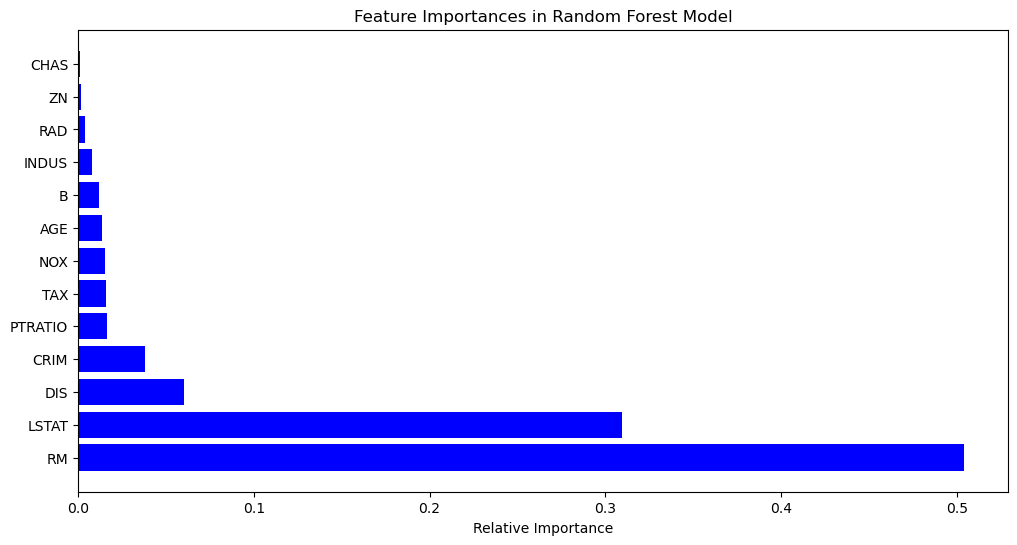

In [12]:
import numpy as np
# Performance Visualization: Actual vs Predicted Values
plt.figure(figsize=(12, 6))
plt.scatter(y_test, y_pred_bagging, alpha=0.5, label='Bagging', color='blue')
plt.scatter(y_test, y_pred_rf, alpha=0.5, label='Random Forest', color='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.show()

# Error Analysis: Residual Plot
residual_bagging = y_test - y_pred_bagging
residual_rf = y_test - y_pred_rf

plt.figure(figsize=(12, 6))
plt.scatter(y_pred_bagging, residual_bagging, alpha=0.5, label='Bagging', color='blue')
plt.scatter(y_pred_rf, residual_rf, alpha=0.5, label='Random Forest', color='green')
plt.hlines(y=0, xmin=y_pred_bagging.min(), xmax=y_pred_bagging.max(), color='black', lw=2)
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.legend()
plt.show()

# Feature Importance for Random Forest
feature_importances = random_forest_reg.feature_importances_
features = X_train.columns
indices = np.argsort(feature_importances)[::-1]

plt.figure(figsize=(12, 6))
plt.title('Feature Importances in Random Forest Model')
plt.barh(range(len(indices)), feature_importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

### Actual vs Predicted Values Plot

The scatter plot comparing the actual and predicted values for Bagging and Random Forest models provides insight into the performance of the models.

The dashed line represents the ideal scenario where predicted values perfectly match the actual values. Points closer to this line indicate more accurate predictions.

The overlapping of points from both Bagging (in blue) and Random Forest (in green) suggests that their performance is quite similar, although Random Forest appears to have a slightly tighter cluster along the ideal line, indicating a higher accuracy in predictions.

### Residual Plot

The residual plot displays the difference between the actual and predicted values. The horizontal line at zero represents no error. Points above the line indicate overestimation, while points below signify underestimation by the models.

Both models exhibit a random pattern of residuals, indicating that the models' assumptions about the homoscedasticity of errors might hold true.

However, some outliers are noticeable, and Random Forest seems to have fewer outliers compared to Bagging, which may point to its better performance in handling extreme cases.

### Feature Importances in Random Forest Model

The bar chart illustrates the feature importances derived from the Random Forest model. The 'area' feature dominates, showing the most significant influence on housing prices. Other important features include 'bathrooms' and 'parking', while 'mainroad' has the least influence.

This suggests that while location size and amenities significantly affect housing prices, the presence of a main road is less critical.